# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Defining styles and labels formats

0.5 Random sampling of 30% of data

0.6 Exploration of senior_citizen profile

    0.6.1 importance of this profile
            A. count of users
            B. gross sales (total_spent_in_lifetime)
            C. total items (total_items_in_lifetime)
            D. per order stats
    
    0.6.2. demographics of this profile
            A. income
            B. income_group
            C. gender
            D. region
            E. fam_status
            F. n_dependants
    
    0.6.2  what we know about their shopping habits
            A. loyalty_flag (based on max_order)
            B. low_activity_flag
            C. spender_type (based on mean_spending)
            D. frequent_shopper (based on median_days_since_ordering)
            E. day_of_the_week
            F. time_of_day
            G. most popular departments by number of items
            H. most popular departments by amount spent
   


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4 Defining styles and label formats

In [13]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [14]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [15]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [16]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [59]:
# Identifying which profile we are investigating
profile = 'pet_owner'
profile_label = 'Pet Owners'
not_profile_label = 'Other Users'
labels = ['Pet Owners', 'Other Users']
labels_r = ['Other Users', 'Pet Owners']
colors = ['grey', 'deepskyblue']
colors_r = ['deepskyblue', 'grey']

### 0.5 Creating a subset df with each row = 1 user and profile flag

In [18]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [19]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [20]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False


In [21]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [22]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [23]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [24]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,"1,465.60",195,13.93,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.40,88,7.33,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.70,18,3.60,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.00,37,9.25,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

In [25]:
# Create a profile_flag with a more descriptive name for visualizations
df_user_subset.loc[df_user_subset[profile] == True, 'profile_flag'] = profile_label
df_user_subset.loc[df_user_subset[profile] == False, 'profile_flag'] = not_profile_label
    

In [26]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,profile_flag
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.70,59,5.90,False,False,False,True,False,Other Users
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,...,False,"1,465.60",195,13.93,False,False,True,True,False,Other Users
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,...,False,721.40,88,7.33,False,False,False,True,False,Other Users
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,...,False,147.70,18,3.60,False,False,False,True,False,Other Users
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,...,True,340.00,37,9.25,False,False,True,False,False,Other Users


## 0.6. Exploration of pet_owner profile

### 0.6.1 importance of this profile

#### 0.6.1.A  count of users

In [27]:
# Create a temporary df to hold the count of the profile
num_profile = df_user_subset['profile_flag'].value_counts()

In [28]:
num_profile

Other Users    191223
Pet Owners      14986
Name: profile_flag, dtype: int64

Roughly 7.3% of our customer base are pet owners.  (14986/206,209=0.07267) 

In [29]:
# Reset the index so that the correct column headers will appear
num_profile = pd.DataFrame(num_profile).reset_index()

In [30]:
num_profile

,index,profile_flag
0,Other Users,191223
1,Pet Owners,14986


In [31]:
# Set the index to be the boolean column with a header of 'index'
num_profile.set_index('index')

,profile_flag
index,
Other Users,191223
Pet Owners,14986


Text(0.5, 1.0, '7.3% of our users own pets.')

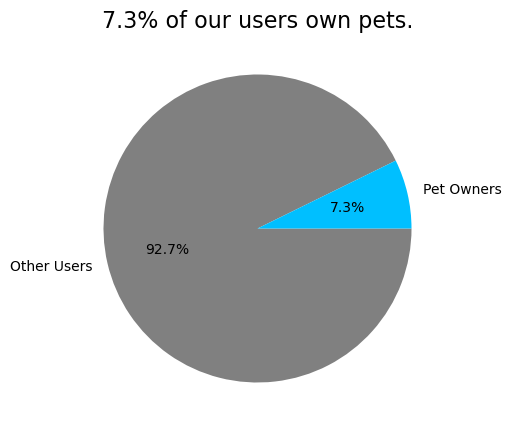

In [58]:
plot = num_profile.plot.pie(y='profile_flag', 
                            figsize=(7,5), 
                            counterclock=False, 
                            colors = ['grey', 'deepskyblue'], 
                            legend=False, 
                            labels = labels_r, 
                            autopct='%1.1f%%')
plt.ylabel("")

plt.title ("7.3% of our users own pets.", 
          size=16)


This visualization does not seem like it will be significant to use in the report.

#### 0.6.1.B  gross sales (total_spent_in_lifetime)

Total gross sales across all profiles = 252418374

In [33]:
# Calculate the gross sales for those in the profile and out of it
gross_sales_profile = df_user_subset.groupby('profile_flag').total_spent_in_lifetime.sum()

In [34]:
gross_sales_profile

profile_flag
Other Users   224,863,568.00
Pet Owners     27,554,806.00
Name: total_spent_in_lifetime, dtype: float32

Pet owners account for 10.9% of gross sales.  This is slightly more than we would expect given that they only account for 7.3% of our user base.

In [35]:
# Reset the index so that the correct column headers will appear
gross_sales_profile = pd.DataFrame(gross_sales_profile).reset_index()

In [36]:
gross_sales_profile

,profile_flag,total_spent_in_lifetime
0,Other Users,"224,863,568.00"
1,Pet Owners,"27,554,806.00"


In [37]:
# Swap the order of the rows so that the pie chart renders correctly
temp = pd.DataFrame()
temp = gross_sales_profile.copy()

In [38]:
temp

,profile_flag,total_spent_in_lifetime
0,Other Users,"224,863,568.00"
1,Pet Owners,"27,554,806.00"


In [39]:
gross_sales_profile.iloc[0] = temp.iloc[1].copy()
gross_sales_profile.iloc[1] = temp.iloc[0].copy()

In [40]:
# Confirming the swap happened correctly
gross_sales_profile

,profile_flag,total_spent_in_lifetime
0,Pet Owners,"27,554,806.00"
1,Other Users,"224,863,568.00"


Text(0.5, 1.0, 'Pet owners account for roughly 10% of sales.')

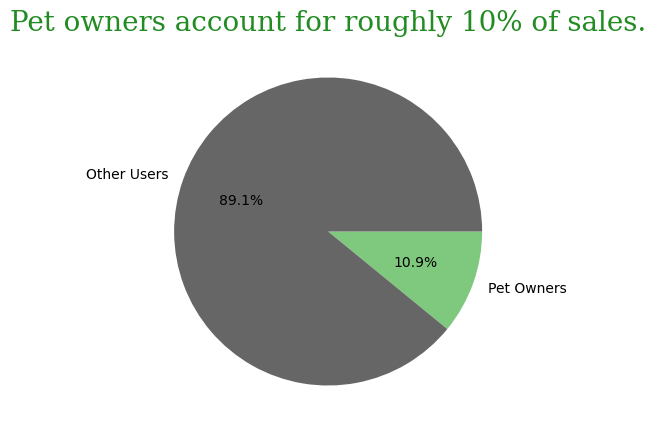

In [41]:
plot = gross_sales_profile.plot.pie(y='total_spent_in_lifetime', 
                                    figsize=(7,5), 
                                    counterclock=False, 
                                    colormap='Accent', 
                                    legend=False, 
                                    labels = labels, 
                                    autopct='%1.1f%%')
plt.ylabel("")

plt.title ("Pet owners account for roughly 10% of sales.", 
           fontdict = font_title)


Rather than using the pie graphs, if a visualization is needed for this topic, we could create a bar chart comparing the percent of pet_owners in our user base to the percent of gross sales from pet_owners

#### 0.6.1.C  total items (total_items_in_lifetime)

Total items across the entire df = 32434489

In [42]:
# Calculate the total items for those in the profile and out of it
total_items = pd.DataFrame(df_user_subset.groupby(profile).total_items_in_lifetime.sum())

In [43]:
total_items

,total_items_in_lifetime
pet_owner,
False,28903972
True,3530517


Pet owners purchase 10.9% of all items.  Since this comparable to the gross sales, we won't make an another visualization. 

In [44]:
#Reclaiming space
del total_items

#### 0.6.1.D per order stats

In [60]:
# Calculate the avg_items_per_order for those in the profile and out of it
size_of_orders = pd.DataFrame(df_user_subset.groupby(profile).avg_items_per_order_by_user.mean())

In [61]:
size_of_orders

,avg_items_per_order_by_user
pet_owner,
False,9.80
True,11.91


Pet owners have orders that are (on average) 21.5% larger than other users.

In [62]:
# Reset the index so that the correct column headers will appear
size_of_orders = pd.DataFrame(size_of_orders).reset_index()

In [63]:
size_of_orders

,pet_owner,avg_items_per_order_by_user
0,False,9.80
1,True,11.91


In [64]:
# Create a 'profile_flag' that allows for more descriptive labels in visualizations
size_of_orders.loc[size_of_orders[profile] == True, 'profile_flag'] = profile_label
size_of_orders.loc[size_of_orders[profile] == False, 'profile_flag'] = not_profile_label
    

In [65]:
size_of_orders

,pet_owner,avg_items_per_order_by_user,profile_flag
0,False,9.80,Other Users
1,True,11.91,Pet Owners


In [66]:
size_of_orders.set_index('profile_flag', drop=True, inplace=True)

In [67]:
size_of_orders

,pet_owner,avg_items_per_order_by_user
profile_flag,,
Other Users,False,9.80
Pet Owners,True,11.91


Text(0.5, 1.0, 'Pet owners place orders \n21.5% larger than other users.')

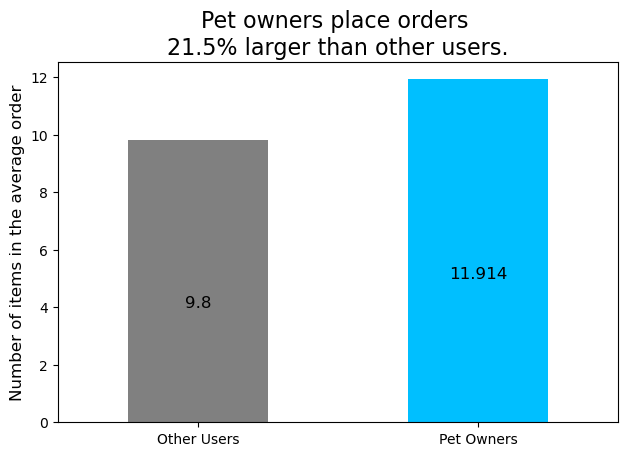

In [73]:
# define x and y to be plotted
x = labels_r
y = size_of_orders['avg_items_per_order_by_user']

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], 
                 ha='center',
                 size = 12)


# Make a bar chart for size_of_orders
bar = size_of_orders['avg_items_per_order_by_user'].plot(kind='bar', 
                                                         color=colors, 
                                                         figsize=(8,6))
# call the function to add value labels
addlabels(x,y)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity

plt.ylabel('Number of items in the average order', size=12)
plt.xlabel('')
plt.xticks(rotation=0)

plt.title ("Pet owners place orders \n21.5% larger than other users.", size=16)

In [74]:
# Create filename for export
filename = profile+'_avg_order_size_bar.png'

In [75]:
filename

'pet_owner_avg_order_size_bar.png'

In [76]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [63]:
#Reclaiming space
del size_of_orders

### 0.6.2 demographics of this profile

#### 0.6.2.A income

In [64]:
# Create a temporary df to hold income statistics by profile group and not
income_stats = df_user_subset.groupby('profile_flag').income.describe()

In [65]:
income_stats

,count,mean,std,min,25%,50%,75%,max
profile_flag,,,,,,,,
Other Users,"191,223.00","94,096.50","42,110.53","25,903.00","59,343.50","93,214.00","123,699.00","593,901.00"
Pet Owners,"14,986.00","101,476.81","46,321.94","26,256.00","67,400.50","97,824.00","131,136.00","591,089.00"


Pet owners have a mean income that is roughly 7k bigger than other users. Their min/max incomes are within 2k of other users

In [66]:
# Create temporary dfs to hold income by profile group for box-and-whiskers plot
income_profile = df_user_subset['income'][df_user_subset['profile_flag']==profile_label]
income_not_profile = df_user_subset['income'][df_user_subset['profile_flag']==not_profile_label]

# Identify dfs to use for box-and-whisker-plots
dataset = [income_not_profile, income_profile]

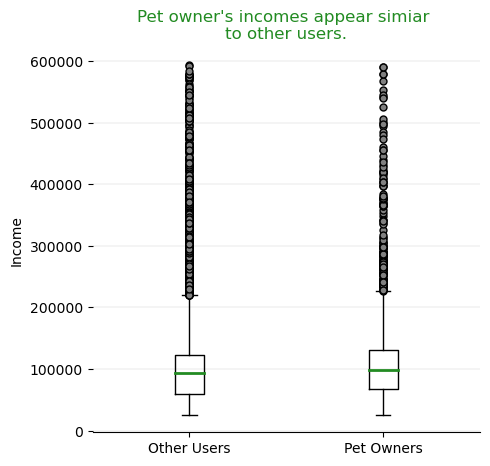

In [67]:
# Create a box-and-whiskers plot of incomes, grouped by profile
fig, ax = plt.subplots(figsize=(5, 5))

# Remove top and side borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add major gridlines in the y-axis
ax.grid(color='grey', 
        axis='y', 
        linestyle='-', 
        linewidth=0.25, 
        alpha=0.5)

#Adjust the look of the boxplot
flierprops = dict(marker='.', 
                  markerfacecolor='grey', 
                  markersize=10, 
                  linestyle='none')
medianprops = dict(linestyle='-', 
                   linewidth=2, 
                   color='forestgreen')

# Set plot title
ax.set_title('Pet owner\'s incomes appear simiar \nto other users.', 
             color='forestgreen')
ax.set_ylabel('Income')

# Note: labels is defined at the beginning of 0.6

# Create boxplot
income_box = ax.boxplot(dataset, 
                        labels=labels_r,
                        flierprops=flierprops, 
                        medianprops=medianprops)

plt.show()

In [68]:
# Reclaiming space
del income_stats
del income_profile
del income_not_profile
del dataset

#### 0.6.2.B income_groups

In [78]:
# Create a cross tabulation to show the proportions of the profile
# members in each income_group
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Pet Owners
income_group,,
Affluent,0.81,0.19
Low income,0.95,0.05
Middle class,0.92,0.08
Upper middle class,0.91,0.09


Affluent users are more likely to own pets than other income groups.
Additionally, pet owners are less likely to be low income.

In [87]:
# Rearranging rows so they show up in the visualization correctly
# First reset the index to allow swapping the loyalty_flag as well
cross_tab_prop_groups = cross_tab_prop_groups.reset_index()
cross_tab_prop_groups

profile_flag,income_group,Other Users,Pet Owners
0,Affluent,0.81,0.19
1,Low income,0.95,0.05
2,Middle class,0.92,0.08
3,Upper middle class,0.91,0.09


In [88]:
# Create a temp copy of the df
temp = pd.DataFrame()
temp = cross_tab_prop_groups.copy()
temp

profile_flag,income_group,Other Users,Pet Owners
0,Affluent,0.81,0.19
1,Low income,0.95,0.05
2,Middle class,0.92,0.08
3,Upper middle class,0.91,0.09


In [89]:
# Rearrange the rows into income order
cross_tab_prop_groups.iloc[1] = temp.iloc[3].copy()
cross_tab_prop_groups.iloc[3] = temp.iloc[1].copy()
cross_tab_prop_groups

profile_flag,income_group,Other Users,Pet Owners
0,Affluent,0.81,0.19
1,Upper middle class,0.91,0.09
2,Middle class,0.92,0.08
3,Low income,0.95,0.05


In [91]:
# Return the index to being the loyalty_flag
cross_tab_prop_groups = cross_tab_prop_groups.set_index('income_group')
cross_tab_prop_groups

profile_flag,Other Users,Pet Owners
income_group,,
Affluent,0.81,0.19
Upper middle class,0.91,0.09
Middle class,0.92,0.08
Low income,0.95,0.05


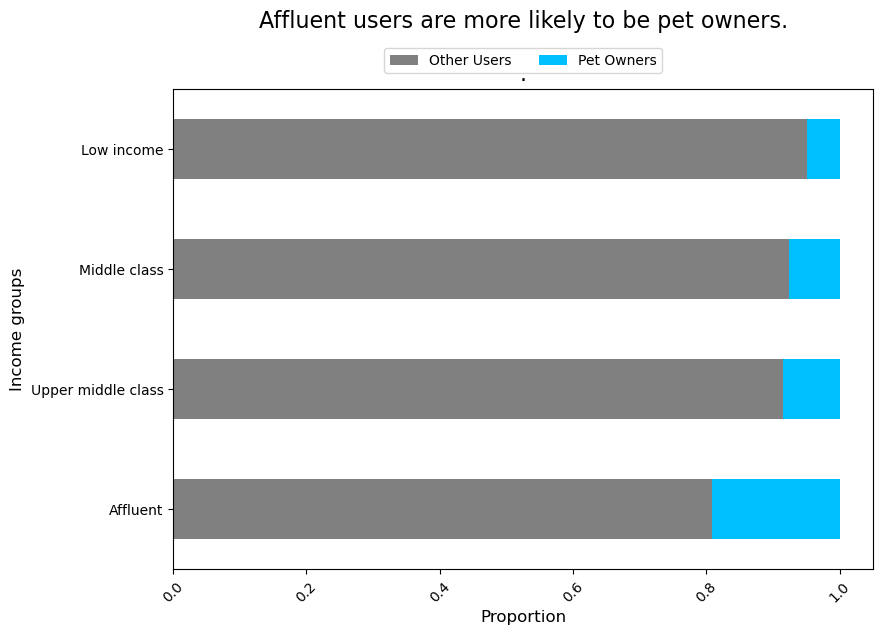

In [92]:
# Create a stacked column plot showing the proportion 
# of pet_owners in each income_group.

income_plot = cross_tab_prop_groups.plot(kind='barh',
                   stacked=True,
                   figsize=(10,8),
                   color = colors)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.legend(loc='upper center', 
           ncol=2, 
           bbox_to_anchor=(0.5, 1.1))
plt.xticks(rotation = 45)
plt.xlabel('Proportion', size=12)
plt.ylabel('Income groups', size=12)
plt.title('Affluent users are more likely to be pet owners.\n \n.',
         size=16)

plt.show()

In [93]:
# Create filename for export
filename = profile+'_income_group_bar.png'

In [94]:
filename

'pet_owner_income_group_bar.png'

In [95]:
# Exporting bar chart
income_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [76]:
#Reclaiming space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.C gender

In [77]:
# Create a cross tabulation to show the proportions of the profile
# members in each gender
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['gender'],
                            normalize='index')
cross_tab_prop_groups

gender,Female,Male
profile_flag,,
Other Users,0.50,0.50
Pet Owners,0.50,0.50


Since it appears that both the profile group and not-profile group are split 50-50 across genders, this does not warrant a visualization. 

In [78]:
# Reclaiming space
del cross_tab_prop_groups

#### 0.6.2.D region

In [79]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['region'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Pet Owners
region,,
Midwest,0.93,0.07
Northeast,0.93,0.07
South,0.93,0.07
West,0.93,0.07


In [80]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['region'],
                            normalize='index')
cross_tab_prop_groups2

region,Midwest,Northeast,South,West
profile_flag,,,,
Other Users,0.24,0.18,0.33,0.25
Pet Owners,0.23,0.18,0.33,0.26


There are minimal difference by region for where the profile group is located

In [81]:
#Reclaiming space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.E fam_status

In [82]:
# Create a cross tabulation to show the proportions of the profile
# members by fam_status
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['fam_status'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Pet Owners
fam_status,,
divorced/widowed,0.93,0.07
living with parents and siblings,0.93,0.07
married,0.93,0.07
single,0.93,0.07


In [83]:
# Create a cross tabulation to show the proportions of the profile
# members by fam_status
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['fam_status'],
                            normalize='index')
cross_tab_prop_groups2

fam_status,divorced/widowed,living with parents and siblings,married,single
profile_flag,,,,
Other Users,0.09,0.05,0.70,0.16
Pet Owners,0.08,0.05,0.71,0.16


There are minimal differences between family status for this profile.

In [84]:
# Reclaim space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.F n_dependants

In [85]:
# Create a cross tabulation to show the proportions of the profile
# members with n_dependants
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['n_dependants'],
                            normalize='index')
cross_tab_prop_groups

n_dependants,0,1,2,3
profile_flag,,,,
Other Users,0.25,0.25,0.25,0.25
Pet Owners,0.25,0.26,0.25,0.25


Pet owners are essentially split between having 0, 1, 2, or 3 children.
This does not seem to warrent a visualization.

In [86]:
# Reclaim space
del cross_tab_prop_groups

### 0.6.3 what we know about their shopping habits

#### 0.6.2.A loyalty_flag (based on max_order)

In [96]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')
cross_tab_prop_groups

loyalty_flag,Loyal customer,New customer,Regular customer
profile_flag,,,
Other Users,0.08,0.56,0.37
Pet Owners,0.13,0.40,0.47


13% of pet owners are loyal customers -- almost twice what we'd expect given their proportion in the user base.


In [127]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['loyalty_flag'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups2

profile_flag,Other Users,Pet Owners
loyalty_flag,,
Loyal customer,0.89,0.11
New customer,0.95,0.05
Regular customer,0.91,0.09


In [128]:
# Create a cross tabulation with just the counts
cross_tab = pd.crosstab(index=df_user_subset['loyalty_flag'],
                       columns=df_user_subset['profile_flag'])

cross_tab

profile_flag,Other Users,Pet Owners
loyalty_flag,,
Loyal customer,15066,1951
New customer,106334,5994
Regular customer,69823,7041


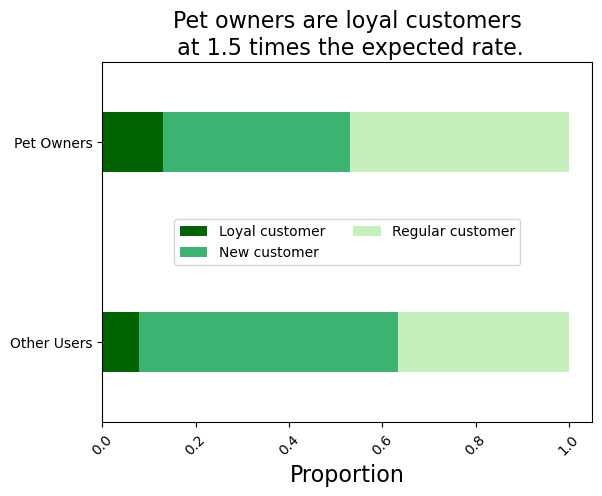

In [163]:
# Create a stacked column plot showing the proportion 
# of baby_parents in each loyalty_group.

loyalty_plot = cross_tab_prop_groups.plot(kind='barh',
                   stacked=True,
                   figsize=(7,6),
                   color=['darkgreen', 'mediumseagreen', '#C5EFBB'],
                    width = 0.3)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.legend(loc='center', ncol=2)
plt.xticks(rotation = 45)
plt.xlabel('Proportion', size=16)
plt.ylabel('')
plt.title('Pet owners are loyal customers\n at 1.5 times the expected rate.',
         size=16)

plt.show()

In [164]:
# Create filename for export
filename = profile+'_loyalty_bar.png'

In [165]:
filename

'pet_owner_loyalty_bar.png'

In [166]:
# Exporting bar chart
loyalty_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [94]:
# Reclaiming space
del cross_tab
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.B low_activity_flag

In [95]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['low_activity_flag'],
                            normalize='index')
cross_tab_prop_groups

low_activity_flag,False,True
profile_flag,,
Other Users,0.78,0.22
Pet Owners,0.88,0.12


Pet owners are less likely to have a low_activity_flag.  

In [96]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.C spender_type (based on mean_spending)

In [97]:
# Create a cross tabulation to show the proportions of the profile
# members with spender_type
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['spender_type'],
                            normalize='index')
cross_tab_prop_groups

spender_type,High spender,Low spender
profile_flag,,
Other Users,0.02,0.98
Pet Owners,0.01,0.99


In [98]:
# Create a cross tabulation to show the proportions of the profile
# members with spender_type
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['spender_type'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Pet Owners
spender_type,,
High spender,0.97,0.03
Low spender,0.93,0.07


The vast majority of pet owners are low spenders (just like the vast majority of other users) 

In [99]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.D frequent_shopper (based on median_days_since_ordering)

In [100]:
# Create a cross tabulation to show the proportions of the profile
# members with frequent_shopper
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_prop_groups

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
profile_flag,,,
Other Users,0.41,0.28,0.31
Pet Owners,0.49,0.20,0.31


Pet owners are more likely to be frequent customers.

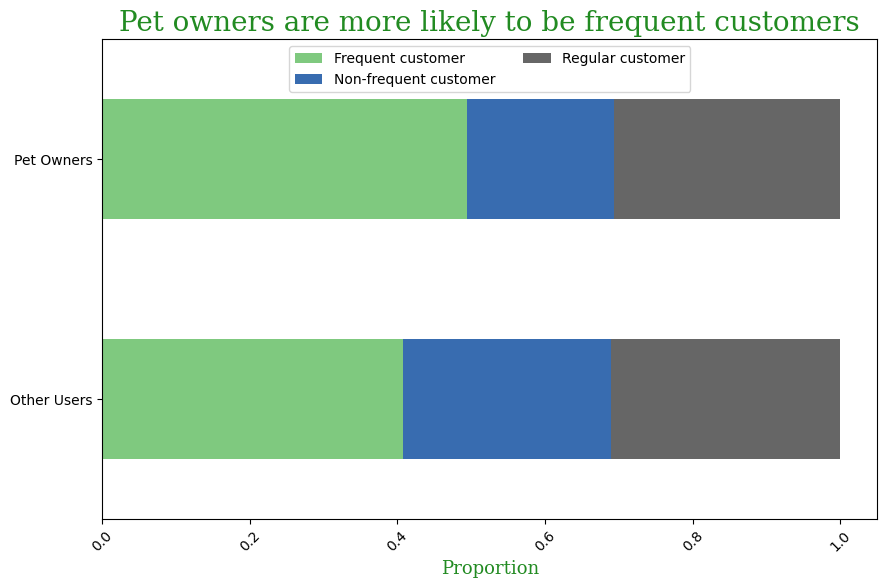

In [101]:
# Create a stacked column plot showing the proportion 
# of senior_citizens in each income_group.

frequency_plot = cross_tab_prop_groups.plot(kind='barh',
                   stacked=True,
                   figsize=(10,8),
                   colormap='Accent')

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(loc='upper center', ncol=2)
plt.xticks(rotation = 45)
plt.xlabel('Proportion', fontdict=font_sm_label)
plt.ylabel('', fontdict=font_sm_label)
plt.title('Pet owners are more likely to be frequent customers',
         fontdict=font_title)

plt.show()

In [102]:
# Create filename for export
filename = profile+'_frequency_bar.png'

In [103]:
filename

'pet_owner_frequency_bar.png'

In [104]:
# Exporting bar chart
frequency_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [105]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.E order_day_of_week

In [106]:
# Create a cross tabulation to show the proportions of the profile
# members with order_day_of_week
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_day_of_week'],
                            normalize='index')
cross_tab_prop_groups

order_day_of_week,0,1,2,3,4,5,6
pet_owner,,,,,,,
False,0.19,0.18,0.13,0.12,0.12,0.13,0.14
True,0.19,0.16,0.13,0.12,0.12,0.13,0.15


Since there is minimal difference in the day of the week when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [107]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.F order_hour_of_day

In [108]:
# Create a cross tabulation to show the proportions of the profile
# members with order_hour_of_day
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_hour_of_day'],
                            normalize='index')
cross_tab_prop_groups

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pet_owner,,,,,,,,,,,,,,,,,,,,,
False,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.08,...,0.08,0.08,0.08,0.06,0.05,0.04,0.03,0.03,0.02,0.01
True,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.07,...,0.08,0.09,0.08,0.07,0.06,0.04,0.03,0.02,0.02,0.01


In [109]:
# Transpose the data to allow for easier examination
cross_tab_prop_groups.transpose()

pet_owner,False,True
order_hour_of_day,,
0,0.01,0.01
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.01,0.01
7,0.03,0.03
8,0.05,0.05


Since there is minimal difference in the hour of day when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [110]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.G most popular departments by number of items

In [111]:
# Create a cross tabulation to show the proportions of the profile
# members with department_id to see which departments sold the most items
# for the profile and not-profile groups.
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['department_id'],
                            normalize='index')
cross_tab_prop_groups

department_id,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00
pet_owner,,,,,,,,,,,,,,,,,,,,,
False,0.07,0.00,0.04,0.30,0.00,0.01,0.08,0.00,0.03,0.00,...,0.02,0.06,0.02,0.03,0.17,0.02,0.01,0.09,0.03,0.00
True,0.08,0.00,0.04,0.22,0.01,0.01,0.09,0.03,0.03,0.00,...,0.02,0.06,0.02,0.04,0.15,0.04,0.01,0.09,0.03,0.00


In [112]:
cross_tab_prop_groups.transpose()

pet_owner,False,True
department_id,,
1.00,0.07,0.08
2.00,0.00,0.00
3.00,0.04,0.04
4.00,0.30,0.22
5.00,0.00,0.01
6.00,0.01,0.01
7.00,0.08,0.09
8.00,0.00,0.03
9.00,0.03,0.03


Most departments have <=2% variation in percent of orders based on whether a user is in this profile or not.  The exceptions are dept 4 (alcohol) where pet owners are order from that dept 8% less frequently than other users, and dept 8 (pets) where obviously pet owners order more frequently. 

In [113]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.H most popular departments by amount spent

In [135]:
# Create a temporary dataframe to hold the spending by profile for each dept
temp = df.groupby(['department_id', profile]).price.sum()

In [136]:
profile_spend_by_dept = pd.DataFrame(temp)

In [137]:
profile_spend_by_dept.shape

(41, 1)

In [138]:
profile_spend_by_dept.head()

price
department_id pet_owner              
1.00          False     15,022,251.00
              True       2,266,955.75
2.00          False        212,625.09
              True          41,082.90
3.00          False      8,106,579.50

In [139]:
# Rename column for clarity
profile_spend_by_dept.rename(columns={'price':'total_spent'}, inplace=True)

In [140]:
# Reset the index so that the correct column headers will appear
profile_spend_by_dept = pd.DataFrame(profile_spend_by_dept).reset_index()

In [141]:
profile_spend_by_dept.head()

,department_id,pet_owner,total_spent
0,1.00,False,"15,022,251.00"
1,1.00,True,"2,266,955.75"
2,2.00,False,"212,625.09"
3,2.00,True,"41,082.90"
4,3.00,False,"8,106,579.50"


In [142]:
# Insert a row to make it clear that the non-pet owners purchased $0
# from the pet dept
profile_spend_by_dept.loc[13.5] = 8.0, False, 0

In [143]:
profile_spend_by_dept = profile_spend_by_dept.sort_index().reset_index(drop=True)

In [144]:
profile_spend_by_dept.head()

,department_id,pet_owner,total_spent
0,1.00,False,"15,022,251.00"
1,1.00,True,"2,266,955.75"
2,2.00,False,"212,625.09"
3,2.00,True,"41,082.90"
4,3.00,False,"8,106,579.50"


In [145]:
# Adding a column with profile-specific labels for clarity in the viz
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == True, 'profile_flag'] = profile_label
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == False, 'profile_flag'] = not_profile_label

In [146]:
profile_spend_by_dept.head()

,department_id,pet_owner,total_spent,profile_flag
0,1.00,False,"15,022,251.00",Other Users
1,1.00,True,"2,266,955.75",Pet Owners
2,2.00,False,"212,625.09",Other Users
3,2.00,True,"41,082.90",Pet Owners
4,3.00,False,"8,106,579.50",Other Users


In [147]:
# Drop the unnecessary column
profile_spend_by_dept = profile_spend_by_dept.drop(columns=profile)

In [148]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1.00,"15,022,251.00",Other Users
1,1.00,"2,266,955.75",Pet Owners
2,2.00,"212,625.09",Other Users
3,2.00,"41,082.90",Pet Owners
4,3.00,"8,106,579.50",Other Users


In [149]:
# Adjusting department_id datatype to match that of dept_data
profile_spend_by_dept['department_id'] = profile_spend_by_dept['department_id'].astype('int8')

In [150]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1,"15,022,251.00",Other Users
1,1,"2,266,955.75",Pet Owners
2,2,"212,625.09",Other Users
3,2,"41,082.90",Pet Owners
4,3,"8,106,579.50",Other Users


In [151]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,"17,289,206.00",7.74,1180461,1.89,4006
1,other,2,36291,"253,708.00",6.99,35056,1.04,548
2,bakery,3,1172428,"9,208,026.00",7.85,878658,1.33,1515
3,produce,4,9479291,"75,660,936.00",7.98,2409320,3.93,1684
4,alcohol,5,153696,"1,251,654.25",8.14,84689,1.81,1054


In [152]:
# Merge total_spent_in_dept from dept_data with this df

profile_spend_by_dept = profile_spend_by_dept.merge(dept_data[['department_id','total_spent_in_dept', 'department']], on=['department_id'], how='left')

In [153]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag,total_spent_in_dept,department
0,1,"15,022,251.00",Other Users,"17,289,206.00",frozen
1,1,"2,266,955.75",Pet Owners,"17,289,206.00",frozen
2,2,"212,625.09",Other Users,"253,708.00",other
3,2,"41,082.90",Pet Owners,"253,708.00",other
4,3,"8,106,579.50",Other Users,"9,208,026.00",bakery


In [154]:
# Create column with percent_of_total_dept_sales
profile_spend_by_dept['percent_of_total_dept_sales'] = profile_spend_by_dept['total_spent']/profile_spend_by_dept['total_spent_in_dept']

In [155]:
profile_spend_by_dept

,department_id,total_spent,profile_flag,total_spent_in_dept,department,percent_of_total_dept_sales
0,1,"15,022,251.00",Other Users,"17,289,206.00",frozen,0.87
1,1,"2,266,955.75",Pet Owners,"17,289,206.00",frozen,0.13
2,2,"212,625.09",Other Users,"253,708.00",other,0.84
3,2,"41,082.90",Pet Owners,"253,708.00",other,0.16
4,3,"8,106,579.50",Other Users,"9,208,026.00",bakery,0.88
5,3,"1,101,446.50",Pet Owners,"9,208,026.00",bakery,0.12
6,4,"69,340,936.00",Other Users,"75,660,936.00",produce,0.92
7,4,"6,320,002.50",Pet Owners,"75,660,936.00",produce,0.08
8,5,"1,031,468.50",Other Users,"1,251,654.25",alcohol,0.82
9,5,"220,185.80",Pet Owners,"1,251,654.25",alcohol,0.18


In [156]:
# Separate out the percentages for each group
dept_spend_by_profile = profile_spend_by_dept[profile_spend_by_dept['profile_flag']==profile_label]
dept_spend_by_not_profile = profile_spend_by_dept[profile_spend_by_dept['profile_flag']!=profile_label]

In [157]:
dept_spend_by_profile.head()

,department_id,total_spent,profile_flag,total_spent_in_dept,department,percent_of_total_dept_sales
1,1,"2,266,955.75",Pet Owners,"17,289,206.00",frozen,0.13
3,2,"41,082.90",Pet Owners,"253,708.00",other,0.16
5,3,"1,101,446.50",Pet Owners,"9,208,026.00",bakery,0.12
7,4,"6,320,002.50",Pet Owners,"75,660,936.00",produce,0.08
9,5,"220,185.80",Pet Owners,"1,251,654.25",alcohol,0.18


In [158]:
dept_spend_by_not_profile.head()

,department_id,total_spent,profile_flag,total_spent_in_dept,department,percent_of_total_dept_sales
0,1,"15,022,251.00",Other Users,"17,289,206.00",frozen,0.87
2,2,"212,625.09",Other Users,"253,708.00",other,0.84
4,3,"8,106,579.50",Other Users,"9,208,026.00",bakery,0.88
6,4,"69,340,936.00",Other Users,"75,660,936.00",produce,0.92
8,5,"1,031,468.50",Other Users,"1,251,654.25",alcohol,0.82


In [159]:
# Create filename for export
filename = profile+'_prop_total_sales_bar.png'

In [160]:
filename

'pet_owner_prop_total_sales_bar.png'

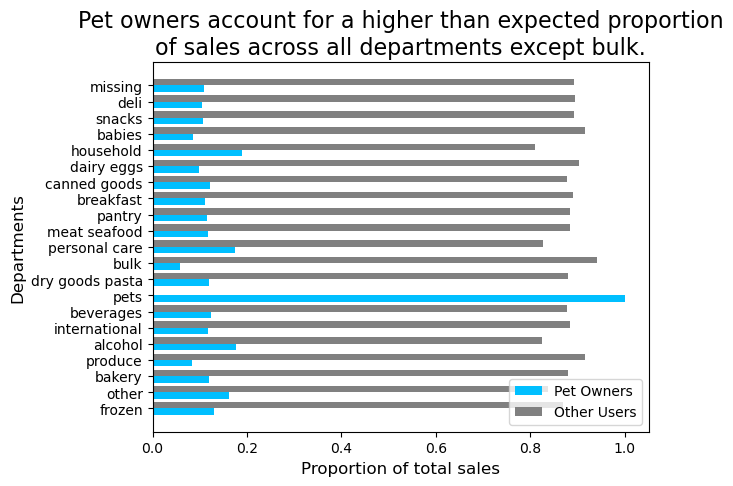

In [161]:
# List departments
y = dept_spend_by_profile['department']

# Define the length for the x-axis
y_axis=np.arange(len(y))

plt.barh(y_axis - 0.2, 
         dept_spend_by_profile['percent_of_total_dept_sales'], 
         0.4, 
         label = profile_label, 
         color='deepskyblue')
plt.barh(y_axis + 0.2, 
         dept_spend_by_not_profile['percent_of_total_dept_sales'], 
         0.4, 
         label = not_profile_label, 
         color='grey')

plt.yticks(y_axis, y)
plt.xlabel("Proportion of total sales", size=12)
plt.ylabel("Departments", size=12)
plt.title("Pet owners account for a higher than expected proportion\nof sales across all departments except bulk.", size=16)
plt.legend()

# Exporting bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', filename),bbox_inches='tight', pad_inches=0.2)

plt.show()

In [162]:
# Reclaim space
del dept_spend_by_profile
del dept_spend_by_not_profile
del profile_spend_by_dept